In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# ! pip install geopandas
import ast
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import fiona
from scipy import stats

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
dem = pd.read_csv('Data/demographic_data.csv').drop(columns=['Unnamed: 0', 'avg_population'])
pop = pd.read_csv('Data/nyc_2010pop_2020precincts.csv')

In [4]:
dem

,precinct,avg_median_income,avg_unemployment_rate,avg_white_frac,avg_black_frac,avg_native_frac,avg_asian_frac,avg_single_frac,avg_liveswspouse_frac,avg_liveswunmarried_frac,avg_bachelors_frac,avg_blacks_1990
0,113.0,73639.0,0.165695,0.069446,0.760327,0.002521,0.044165,0.089466,0.293253,0.027804,0.121080,23552.000000
1,77.0,68338.5,0.066822,0.370985,0.496579,0.001458,0.041449,0.179803,0.295308,0.082790,0.265704,43201.000000
2,73.0,26521.0,0.151532,0.084439,0.798307,0.000913,0.011177,0.279387,0.186308,0.034035,0.105935,77898.000000
3,71.0,59820.0,0.065522,0.284880,0.609103,0.002322,0.028351,0.177917,0.260933,0.091161,0.242412,58361.000000
4,66.0,55741.0,0.054696,0.661372,0.055067,0.004345,0.185787,0.116409,0.514459,0.038435,0.202229,6016.666667
...,...,...,...,...,...,...,...,...,...,...,...,...
71,103.0,60195.0,0.113131,0.110702,0.444281,0.003677,0.165136,0.090569,0.317086,0.036683,0.159744,21583.500000
72,102.0,72426.4,0.058456,0.358858,0.083507,0.007154,0.254101,0.082886,0.382400,0.044674,0.190223,2930.200000
73,81.0,50902.5,0.063276,0.193222,0.619665,0.003543,0.027089,0.155012,0.207458,0.071697,0.199298,50462.500000
74,79.0,67795.0,0.057371,0.312602,0.539940,0.002752,0.053006,0.180034,0.248387,0.094499,0.302770,56504.000000


In [5]:
dem = dem.astype({"precinct": float})

In [6]:
clean_17 = pd.read_csv('Data/df_2017_clean.csv')[:-1]

In [7]:
clean_18 = pd.read_csv('Data/df_2018_clean.csv')[:-1]

In [8]:
clean_19 = pd.read_csv('Data/df_2019_clean.csv')[:-1]

In [9]:
clean_20 = pd.read_csv('Data/df_2020_clean.csv')[:-1]

In [10]:
avg_pop = pop[['precinct_2020', 'P0010001']].rename(columns={'precinct_2020': 'precinct', 'P0010001': 'avg_population'})
avg_pop = avg_pop.astype({'precinct': float})

In [11]:
clean_17['total_complaints_17'] = clean_17.iloc[:, 1:13].sum(axis=1)
clean_17 = clean_17.astype({'precinct': float})
clean_17 = clean_17.merge(avg_pop, on='precinct')
clean_17['total_complaints_17_per_capita'] = (clean_17['total_complaints_17']/clean_17['avg_population'])*100

clean_18['total_complaints_18'] = clean_18.iloc[:, 1:].sum(axis=1)
clean_18 = clean_18.astype({'precinct': float})
clean_18 = clean_18.merge(avg_pop, on='precinct')
clean_18['total_complaints_18_per_capita'] = (clean_18['total_complaints_18']/clean_18['avg_population'])*100

clean_19['total_complaints_19'] = clean_19.iloc[:, 1:].sum(axis=1)
clean_19 = clean_19.astype({'precinct': float})
clean_19 = clean_19.merge(avg_pop, on='precinct')
clean_19['total_complaints_19_per_capita'] = (clean_19['total_complaints_19']/clean_19['avg_population'])*100

clean_20['total_complaints_20'] = clean_20.iloc[:, 1:].sum(axis=1)
clean_20 = clean_20.astype({'precinct': float})
clean_20 = clean_20.merge(avg_pop, on='precinct')
clean_20['total_complaints_20_per_capita'] = (clean_20['total_complaints_20']/clean_20['avg_population'])*100

In [12]:
clean_17

,precinct,jan,feb,march,april,may,june,july,aug,sept,oct,nov,dec,total_complaints_17,avg_population,total_complaints_17_per_capita
0,1.0,32,34,48,55,48,60,44,44,30,39,26,44,504,66679,0.755860
1,5.0,47,68,53,35,51,37,57,58,53,60,35,55,609,52568,1.158499
2,6.0,22,20,17,34,22,16,25,24,27,27,42,30,306,62226,0.491756
3,7.0,122,116,111,84,103,107,121,102,93,115,125,113,1312,56355,2.328099
4,9.0,130,109,103,117,133,91,96,109,97,114,126,113,1338,76443,1.750324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,115.0,240,191,195,256,226,214,233,237,240,243,226,248,2749,171576,1.602205
73,120.0,384,334,345,392,403,414,411,396,366,449,346,400,4640,113008,4.105904
74,121.0,280,233,219,215,264,265,302,265,260,242,254,231,3030,118708,2.552482
75,122.0,165,154,145,165,187,198,191,189,180,200,170,175,2119,138982,1.524658


In [13]:
df = clean_17.merge(clean_18, how='outer', left_on='precinct', right_on='precinct').merge(clean_19, how='outer', left_on='precinct', right_on='precinct')
new_df = df[['precinct', 'total_complaints_17', 'total_complaints_17_per_capita', 'total_complaints_18', 'total_complaints_18_per_capita', 'total_complaints_19', 'total_complaints_19_per_capita', 'avg_population']]
new_df

,precinct,total_complaints_17,total_complaints_17_per_capita,total_complaints_18,total_complaints_18_per_capita,total_complaints_19,total_complaints_19_per_capita,avg_population
0,1.0,504,0.755860,542,0.812850,510,0.764859,66679
1,5.0,609,1.158499,603,1.147086,612,1.164206,52568
2,6.0,306,0.491756,279,0.448366,332,0.533539,62226
3,7.0,1312,2.328099,1285,2.280188,1378,2.445213,56355
4,9.0,1338,1.750324,1226,1.603809,1326,1.734626,76443
...,...,...,...,...,...,...,...,...
72,115.0,2749,1.602205,2730,1.591132,2593,1.511284,171576
73,120.0,4640,4.105904,4642,4.107674,4265,3.774069,113008
74,121.0,3030,2.552482,2782,2.343566,2612,2.200357,118708
75,122.0,2119,1.524658,2057,1.480048,2029,1.459901,138982


In [14]:
new_df['avg_complaints_17_19'] = (new_df['total_complaints_17_per_capita'] + new_df['total_complaints_18_per_capita'] + new_df['total_complaints_19_per_capita'])/3

/Users/eeshakhanna/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
new_df

,precinct,total_complaints_17,total_complaints_17_per_capita,total_complaints_18,total_complaints_18_per_capita,total_complaints_19,total_complaints_19_per_capita,avg_population,avg_complaints_17_19
0,1.0,504,0.755860,542,0.812850,510,0.764859,66679,0.777856
1,5.0,609,1.158499,603,1.147086,612,1.164206,52568,1.156597
2,6.0,306,0.491756,279,0.448366,332,0.533539,62226,0.491220
3,7.0,1312,2.328099,1285,2.280188,1378,2.445213,56355,2.351167
4,9.0,1338,1.750324,1226,1.603809,1326,1.734626,76443,1.696253
...,...,...,...,...,...,...,...,...,...
72,115.0,2749,1.602205,2730,1.591132,2593,1.511284,171576,1.568207
73,120.0,4640,4.105904,4642,4.107674,4265,3.774069,113008,3.995882
74,121.0,3030,2.552482,2782,2.343566,2612,2.200357,118708,2.365468
75,122.0,2119,1.524658,2057,1.480048,2029,1.459901,138982,1.488202


In [16]:
new_df_merged = new_df.merge(dem, how="left", left_on="precinct", right_on="precinct")
new_df_merged.sample(7)

,precinct,total_complaints_17,total_complaints_17_per_capita,total_complaints_18,total_complaints_18_per_capita,total_complaints_19,total_complaints_19_per_capita,avg_population,avg_complaints_17_19,avg_median_income,avg_unemployment_rate,avg_white_frac,avg_black_frac,avg_native_frac,avg_asian_frac,avg_single_frac,avg_liveswspouse_frac,avg_liveswunmarried_frac,avg_bachelors_frac,avg_blacks_1990
51,81.0,2862,4.562992,2831,4.513568,2912,4.642709,62722,4.573090,50902.500000,0.063276,0.193222,0.619665,0.003543,0.027089,0.155012,0.207458,0.071697,0.199298,50462.500000
65,108.0,1441,1.272968,1430,1.263251,1420,1.254417,113200,1.263545,90726.250000,0.047266,0.543045,0.052309,0.003858,0.290989,0.177409,0.431546,0.085663,0.302553,3981.666667
39,67.0,4715,3.036998,4815,3.101409,4662,3.002860,155252,3.047089,54457.000000,0.058371,0.044214,0.889781,0.001932,0.018269,0.140299,0.299295,0.040442,0.165867,74363.000000
64,107.0,1914,1.266652,1889,1.250108,2194,1.451951,151107,1.322904,70297.250000,0.074071,0.320514,0.170434,0.003815,0.356327,0.089024,0.428399,0.034024,0.239954,8427.000000
58,101.0,3256,4.854991,2924,4.359949,3070,4.577649,67065,4.597530,55471.000000,0.085268,0.404440,0.335699,0.001328,0.039968,0.103828,0.349302,0.043204,0.139032,26144.000000
16,26.0,1047,2.114810,1063,2.147128,1073,2.167326,49508,2.143088,51938.000000,0.060073,0.319213,0.377223,0.006109,0.094633,0.190924,0.238601,0.070150,0.236783,33214.000000
36,62.0,1733,0.952297,1725,0.947901,1881,1.033624,181981,0.977941,54675.666667,0.062891,0.538427,0.026311,0.003133,0.317039,0.096696,0.480834,0.039307,0.199177,1836.000000


In [17]:
new_df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 76
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   precinct                        77 non-null     float64
 1   total_complaints_17             77 non-null     int64  
 2   total_complaints_17_per_capita  77 non-null     float64
 3   total_complaints_18             77 non-null     int64  
 4   total_complaints_18_per_capita  77 non-null     float64
 5   total_complaints_19             77 non-null     int64  
 6   total_complaints_19_per_capita  77 non-null     float64
 7   avg_population                  77 non-null     int64  
 8   avg_complaints_17_19            77 non-null     float64
 9   avg_median_income               74 non-null     float64
 10  avg_unemployment_rate           74 non-null     float64
 11  avg_white_frac                  74 non-null     float64
 12  avg_black_frac                  74 non

In [20]:
new_df_merged.to_csv('demographic_dv_data.csv', index=False)

In [21]:
new_df_merged_dropped = new_df_merged.dropna()

In [22]:
# from sklearn.preprocessing import StandardScaler

# # Use scaler of choice; here Standard scaler is used
# scaler = StandardScaler()
# scaled = scaler.fit_transform(scaled_df)

# scaled_df = pd.DataFrame(columns=new_df_merged_dropped.columns, index=new_df_merged_dropped.index, data=scaled)

In [24]:
x_income = new_df_merged_dropped['avg_median_income'].to_numpy()
x_unemp = new_df_merged_dropped['avg_unemployment_rate'].to_numpy()
x_white = new_df_merged_dropped['avg_white_frac'].to_numpy()
x_black = new_df_merged_dropped['avg_black_frac'].to_numpy()
x_native = new_df_merged_dropped['avg_native_frac'].to_numpy()
x_asian = new_df_merged_dropped['avg_asian_frac'].to_numpy()
x_single = new_df_merged_dropped['avg_single_frac'].to_numpy()
x_spouse = new_df_merged_dropped['avg_liveswspouse_frac'].to_numpy()
x_unmarried = new_df_merged_dropped['avg_liveswunmarried_frac'].to_numpy()
x_edu = new_df_merged_dropped['avg_bachelors_frac'].to_numpy()

y = new_df_merged_dropped['avg_complaints_17_19'].to_numpy()

r value =  -0.6748656733634648
p value =  4.298611415886854e-11


Text(0, 0.5, 'Domestic Violence Complaints Per Capita (%)')

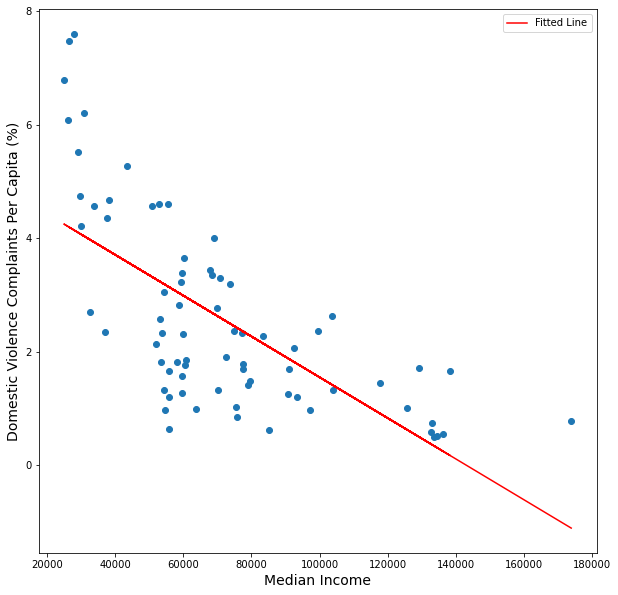

In [25]:
plt.figure(figsize=(10, 10))
plt.scatter(x_income, y)

res = stats.linregress(x_income, y)
print('r value = ', res.rvalue)
print('p value = ', res.pvalue)
plt.plot(x_income, res.intercept + res.slope*x_income, 'r', label='Fitted Line', c='red')

plt.legend()
plt.xlabel('Median Income', size=14)
plt.ylabel('Domestic Violence Complaints Per Capita (%)', size=14)
#plt.title('Per Precinct Median Income vs. Domestic Violence Complaints in NYC (2017-2019 Average)', size=18)

r value =  0.798813515846145
p value =  1.4966133811663275e-17


Text(0, 0.5, 'Domestic Violence Complaints Per Capita (%)')

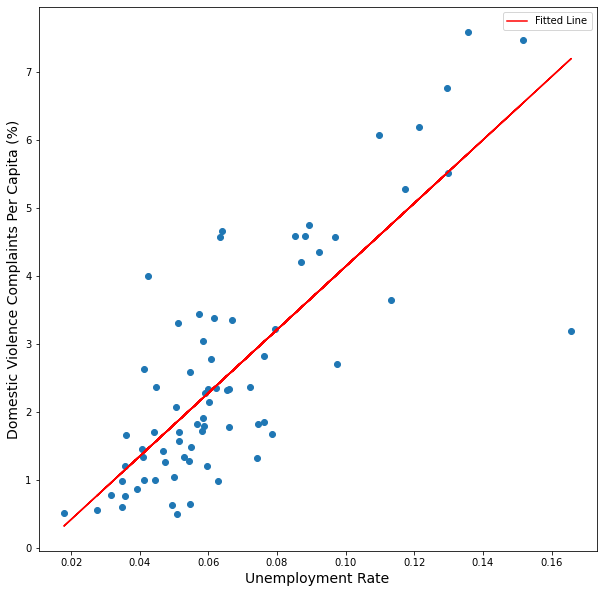

In [26]:
plt.figure(figsize=(10, 10))
plt.scatter(x_unemp, y)

res2 = stats.linregress(x_unemp, y)
print('r value = ', res2.rvalue)
print('p value = ', res2.pvalue)
plt.plot(x_unemp, res2.intercept + res2.slope*x_unemp, 'r', label='Fitted Line')

plt.legend()
plt.xlabel('Unemployment Rate', size=14)
plt.ylabel('Domestic Violence Complaints Per Capita (%)', size=14)
#plt.title('Per Precinct Unemployment Rate vs. Domestic Violence Complaints in NYC (2017-2019 Average)', size=18)

White:
r value =  -0.7004569088131525
p value =  3.744415461462979e-12
Black:
r value =  0.6527874186140835
p value =  2.928604079076129e-10
Native American:
r value =  0.3375837329560752
p value =  0.003266921529156584
Asian:
r value =  -0.5453167759746248
p value =  5.062227274168531e-07


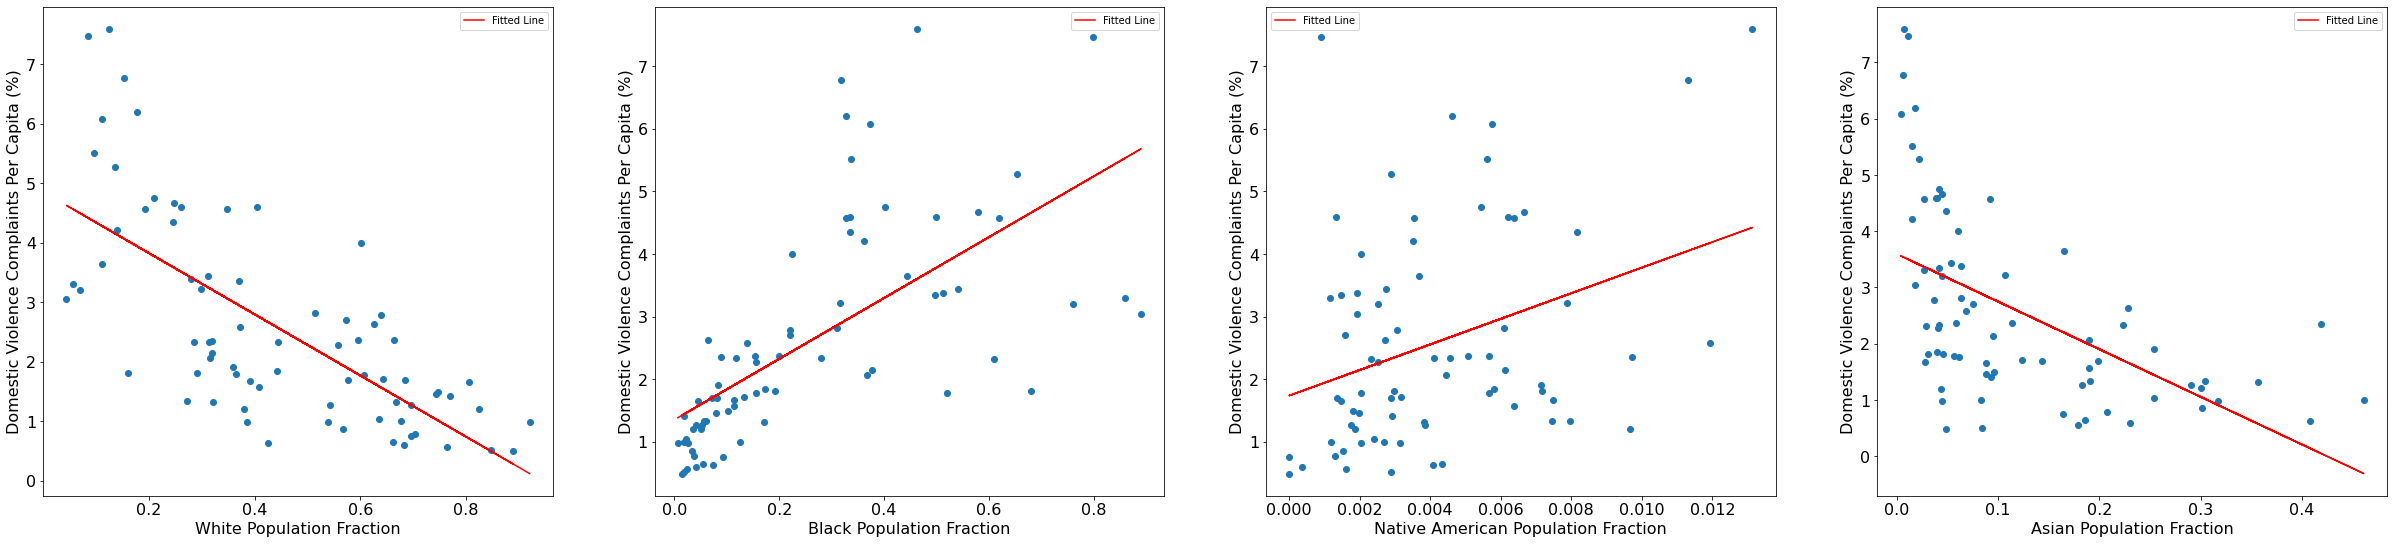

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(42, 9)
#fig.suptitle('Per Precinct Race Fractions vs. Domestic Violence Complaints in NYC (2017-2019 Average)', fontsize=20)

res_white = stats.linregress(x_white, y)
res_black = stats.linregress(x_black, y)
res_native = stats.linregress(x_native, y)
res_asian = stats.linregress(x_asian, y)

ax1.plot(x_white, y, 'o')
ax1.plot(x_white, res_white.intercept + res_white.slope*x_white, 'r', label='Fitted Line')
ax1.legend()
ax1.set_xlabel(xlabel="White Population Fraction", fontsize=16)
ax1.set_ylabel(ylabel="Domestic Violence Complaints Per Capita (%)", fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2.plot(x_black, y, 'o')
ax2.plot(x_black, res_black.intercept + res_black.slope*x_black, 'r', label='Fitted Line')
ax2.legend()
ax2.set_xlabel(xlabel="Black Population Fraction", fontsize=16)
ax2.set_ylabel(ylabel="Domestic Violence Complaints Per Capita (%)", fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

ax3.plot(x_native, y, 'o')
ax3.plot(x_native, res_native.intercept + res_native.slope*x_native, 'r', label='Fitted Line')
ax3.legend()
ax3.set_xlabel(xlabel="Native American Population Fraction", fontsize=16)
ax3.set_ylabel(ylabel="Domestic Violence Complaints Per Capita (%)", fontsize=16)
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=16)

ax4.plot(x_asian, y, 'o')
ax4.plot(x_asian, res_asian.intercept + res_asian.slope*x_asian, 'r', label='Fitted Line')
ax4.legend()
ax4.set_xlabel(xlabel="Asian Population Fraction", fontsize=16)
ax4.set_ylabel(ylabel="Domestic Violence Complaints Per Capita (%)", fontsize=16)
ax4.tick_params(axis='x', labelsize=16)
ax4.tick_params(axis='y', labelsize=16)

print('White:')
print('r value = ', res_white.rvalue)
print('p value = ', res_white.pvalue)
print('Black:')
print('r value = ', res_black.rvalue)
print('p value = ', res_black.pvalue)
print('Native American:')
print('r value = ', res_native.rvalue)
print('p value = ', res_native.pvalue)
print('Asian:')
print('r value = ', res_asian.rvalue)
print('p value = ', res_asian.pvalue)

Lives alone:
r value =  -0.09447237297514187
p value =  0.42334046024856353
Lives with spouse:
r value =  -0.6828762297006599
p value =  2.0561619898972402e-11
Lives with unmarried partner:
r value =  -0.10911800941412478
p value =  0.3547290686891047


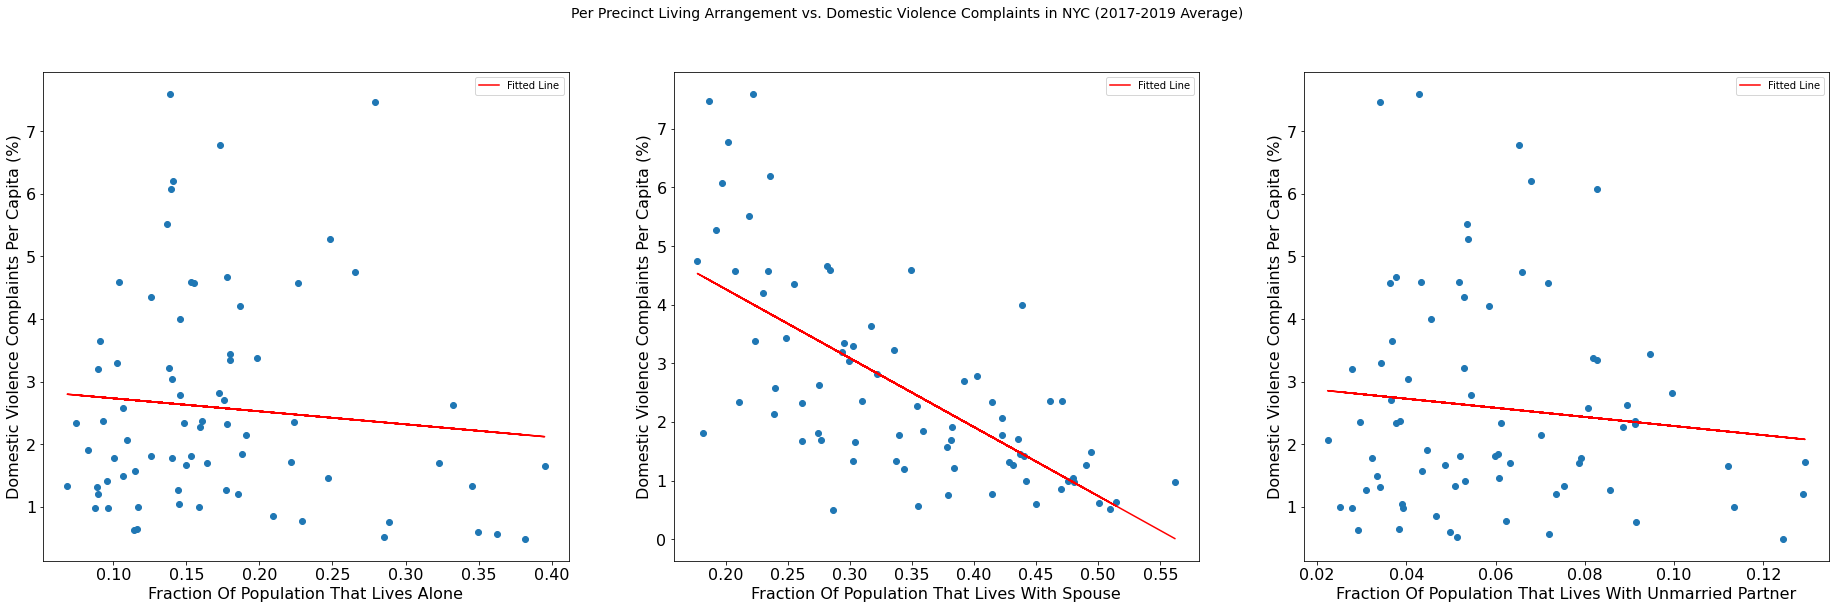

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(32, 9)
fig.suptitle('Per Precinct Living Arrangement vs. Domestic Violence Complaints in NYC (2017-2019 Average)', fontsize=14)

res_single = stats.linregress(x_single, y)
res_spouse = stats.linregress(x_spouse, y)
res_unmarried = stats.linregress(x_unmarried, y)

ax1.plot(x_single, y, 'o')
ax1.plot(x_single, res_single.intercept + res_single.slope*x_single, 'r', label='Fitted Line')
ax1.legend()
ax1.set_xlabel(xlabel="Fraction Of Population That Lives Alone", fontsize=16)
ax1.set_ylabel(ylabel="Domestic Violence Complaints Per Capita (%)", fontsize=16)
ax1.tick_params(axis='x', labelsize=16)
ax1.tick_params(axis='y', labelsize=16)

ax2.plot(x_spouse, y, 'o')
ax2.plot(x_spouse, res_spouse.intercept + res_spouse.slope*x_spouse, 'r', label='Fitted Line')
ax2.legend()
ax2.set_xlabel(xlabel="Fraction Of Population That Lives With Spouse", fontsize=16)
ax2.set_ylabel(ylabel="Domestic Violence Complaints Per Capita (%)", fontsize=16)
ax2.tick_params(axis='x', labelsize=16)
ax2.tick_params(axis='y', labelsize=16)

ax3.plot(x_unmarried, y, 'o')
ax3.plot(x_unmarried, res_unmarried.intercept + res_unmarried.slope*x_unmarried, 'r', label='Fitted Line')
ax3.legend()
ax3.set_xlabel(xlabel="Fraction Of Population That Lives With Unmarried Partner", fontsize=16)
ax3.set_ylabel(ylabel="Domestic Violence Complaints Per Capita (%)", fontsize=16)
ax3.tick_params(axis='x', labelsize=16)
ax3.tick_params(axis='y', labelsize=16)

print('Lives alone:')
print('r value = ', res_single.rvalue)
print('p value = ', res_single.pvalue)
print('Lives with spouse:')
print('r value = ', res_spouse.rvalue)
print('p value = ', res_spouse.pvalue)
print('Lives with unmarried partner:')
print('r value = ', res_unmarried.rvalue)
print('p value = ', res_unmarried.pvalue)

r value =  -0.6748656733634648
p value =  4.298611415886854e-11


Text(0, 0.5, 'Domestic Violence Complaints Per Capita (%)')

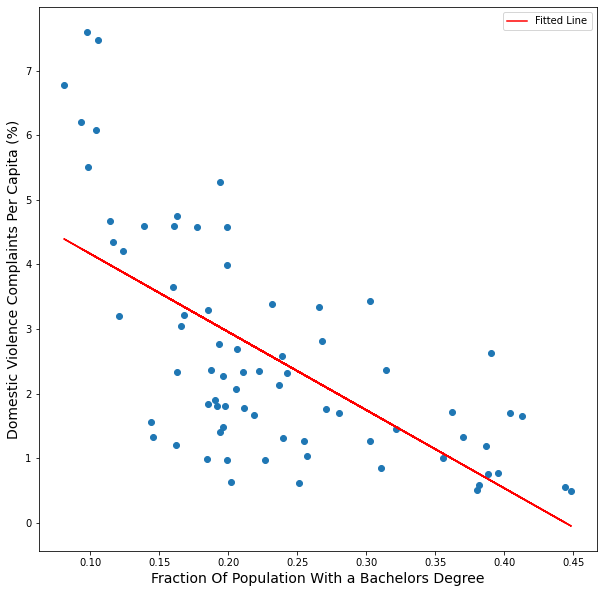

In [29]:
plt.figure(figsize=(10, 10))
plt.scatter(x_edu, y)

res_edu = stats.linregress(x_edu, y)
print('r value = ', res.rvalue)
print('p value = ', res.pvalue)
plt.plot(x_edu, res_edu.intercept + res_edu.slope*x_edu, 'r', label='Fitted Line')

plt.legend()
plt.xlabel('Fraction Of Population With a Bachelors Degree', size=14)
plt.ylabel('Domestic Violence Complaints Per Capita (%)', size=14)
#plt.title('Per Precinct Educational Attainment vs. Domestic Violence Complaints in NYC (2017-2019 Average)', size=18)